In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
file_path = "data.txt"

# Initialize lists to store dates and magnitudes
dates = []
magnitudes = []

# Read the data from the file
with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split(',')
        if len(parts) != 3:
            print(f"Skipping malformed line: {line}")
            continue

        timestamp_str, magnitude, error = parts[0], parts[1], parts[2]
        
        # Skip lines with missing magnitude
        if magnitude == '--':
            continue
        
        # Manually parse the date from the timestamp in the filename
        try:
            date_str = timestamp_str[:14]  # Extract the first 14 characters
            date = datetime.strptime(date_str, "%Y%m%d%H%M%S")
        except ValueError as e:
            print(f"Skipping line due to date parsing error: {line} ({e})")
            continue
        
        # Append the date and magnitude to the lists
        dates.append(date)
        magnitudes.append(float(magnitude))

# Display the parsed data (optional)
for date, magnitude in zip(dates, magnitudes):
    print(f"Date: {date}, Magnitude: {magnitude}")

Skipping line due to date parsing error: file,PSF-mag,error
 (time data 'file' does not match format '%Y%m%d%H%M%S')
Date: 2023-05-20 15:19:00, Magnitude: 12.506685606384277
Date: 2023-05-21 15:49:33, Magnitude: 11.43959384841919
Date: 2023-05-22 15:30:45, Magnitude: 11.038833435058592
Date: 2023-05-22 15:46:24, Magnitude: 11.145306569671632
Date: 2023-05-23 21:08:42, Magnitude: 10.921394969940184
Date: 2023-05-24 18:09:55, Magnitude: 10.79887741470337
Date: 2023-05-24 18:27:25, Magnitude: 10.79894651107788
Date: 2023-05-25 18:47:01, Magnitude: 11.03368240585327
Date: 2023-05-25 19:05:14, Magnitude: 11.003926222229005
Date: 2023-05-25 19:53:22, Magnitude: 10.936714184570313
Date: 2023-05-26 15:21:22, Magnitude: 11.009887004089357
Date: 2023-05-26 15:44:21, Magnitude: 11.036189077758788
Date: 2023-05-27 14:45:18, Magnitude: 11.001685193634032
Date: 2023-05-27 15:08:37, Magnitude: 11.056242567443846
Date: 2023-05-28 15:20:42, Magnitude: 11.064951968383788
Date: 2023-05-28 15:34:28, Magni

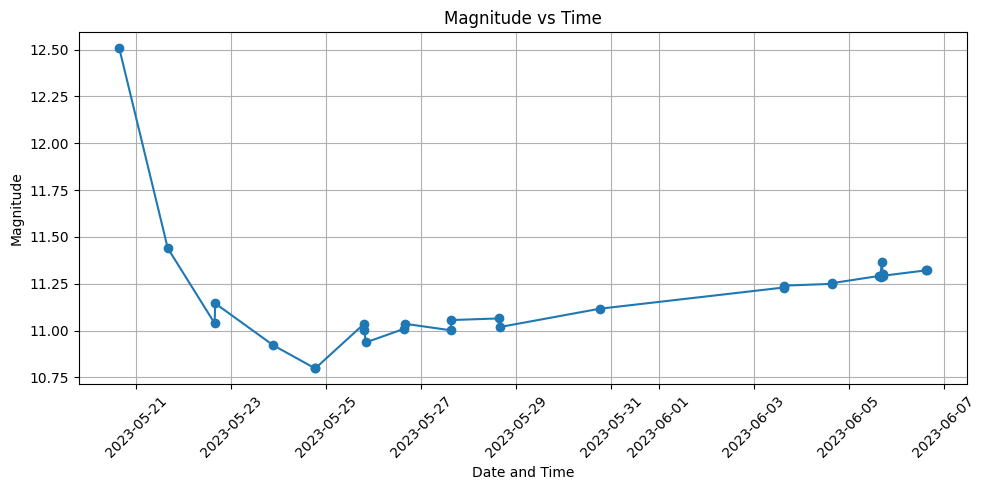

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(dates, magnitudes, marker='o', linestyle='-')
plt.xlabel('Date and Time')
plt.ylabel('Magnitude')
plt.title('Magnitude vs Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig("magnitude_vs_time.png")

# Show the plot
plt.show()